Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **1 hour and 30 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [0]:
NAME = "Norika Narimatsu"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Mergesort and recurrences

## Question 1 [time estimate: 20 minutes]

First, please read carefully [this note](https://drive.google.com/open?id=1SfrRTKWDb6szsJENgvNF7-u2B96ecaF2), which reviews the MERGE operation in Cormen et al.

After reviewing the example above (Cormen et al., Figure 2.3),  you need to manually create similar illustrations as in the example above but this time for the input array:

![array](array.png)

For this exercise, assume that the call to the algorithm is MERGE(A, 1, 3, 6) and draw different resulting stages of the arrays A, L, and R as the merge algorithm is executed.  You can hand-draw or use any drawing tool to produce panel illustrations, as in the example above.  Include your final drawings in the cell below. Feel free to use additional cells (Markdown or Code) for this question.

**Note**: ```MERGE``` function is to combine two lists together, not to create a sorted list. Please check the parameters carefully to correctly identify two sub-lists you need to merge.

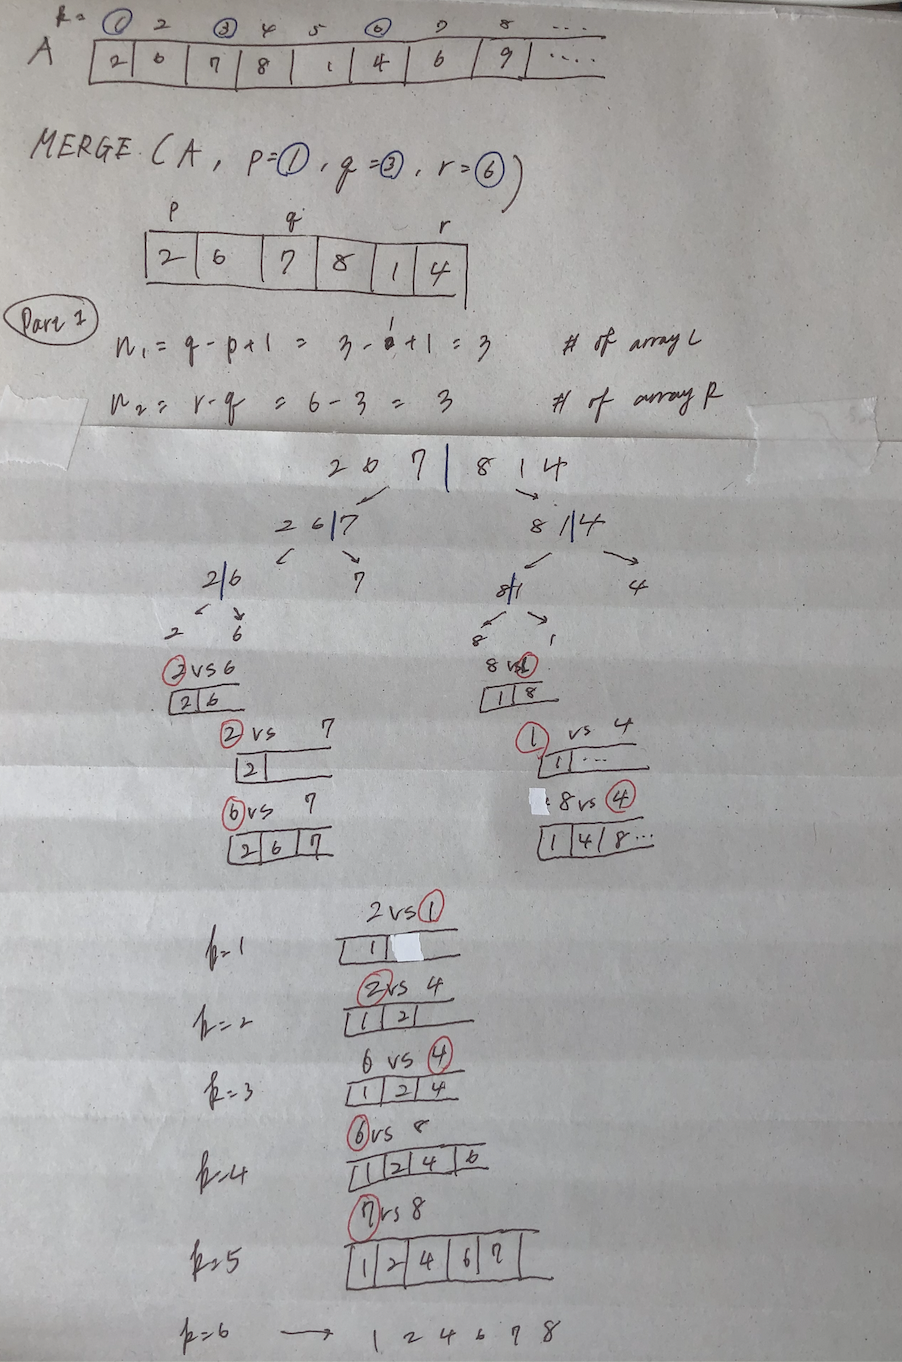

In [1]:
from IPython.display import Image
display(Image(filename='スクリーンショット 2021-01-27 12.47.31.png'))

## Question 2 [time estimate: 5 minutes]
Now using your understanding of Part I of the merge algorithm, can you think of an efficient way to implement this part in Python? (hint: using Python lists). Give your answer in prose in the cell below.

My strategy is to implement the recursive function, which comes back to the function itself with a different input. We also use divide and conquer method to break it down the problem to the level the function solve the problem. Smallest input is a list which only has a single number (meaning that it is always sorted without any work.) So, as we read in the PCW, first part is dividing the list into smaller components and the second part ist to compare the subarrays and sort them. Finally, we will merge them to make the list A sorted.


## Question 3 [time estimate: 20 minutes]

Write a Python implementation of the merge pseudocode (both parts). Your Python function must take the same four input arguments as described in the $MERGE(A,p,q,r)$. Test your code by running the example in problem 1 and 2 of this pre-class work. Feel free to come up with additional cases to check if your code is working properly. Your code should return A.

**Note**: Please note that the pseudocde in Cormen et. al. works with the indexing convention starting at 1; in Python we will use the customary indexing convention starting at 0.

In [31]:
###pesudocode from PCW

def merge(A, p, q, r):
    n1 = q - p + 1# the #of elements in the Left subarray 
    n2 = r-q # the #of elements in the Right subarray 

    left = [0] * (n1) #make blank array, which has n1 elements
    right= [0] * (n2) #make blank array, which has n2 elements

    for i in range(n1):  #for loop accross the elements in left_subarray
        left[i] = A[p + i] #i starts from 0
  
    for j in range(n2):   #for loop accross the elements in right_subarray
        right[j] = A[q + 1 + j] #j starts from 0
   
    i = 0 #set initial conditions
    j = 0 
    k = p #k is for A

       
    while i < n1 and j < n2 : # if there is an element in an subarray, we will continue to compare them
            if left[i] <= right[j]: 
                A[k] = left[i]  #replace A[k] by the number in left array
                i += 1 #move to next 
            else: 
                A[k] = right[j] #replace A[k] by the number in right array
                j += 1 #move to next in rightarray
            k += 1#move to next in A
    return A

#test to make sure works
A = [9,8,7,6,5,4,3,2,1]
merge(A,0,3,8)

#I could not implement this function properly properly. 
#I think I did not set new input correctly (to define what elements are left in the subarray)

[5, 4, 3, 2, 1, 4, 3, 2, 1]

In [0]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 4 [time estimate: 5 minutes]

Suppose that your Python implementation of the merge algorithm is already working. Read and comment the code for merge sort below:

In [29]:
#define function with 3 imputs: A = main list that we want to sort, p is starting points of A and r is the endpoints of A
def merge_sort(A,p,r): 
    
    #continue till the #of element in subarray is 1
    if p < r:
        q = (p+r)//2 #determine the middle point between p and r
        merge_sort(A,p,q) #recall the function again with left array
        merge_sort(A,q+1,r) #recall the function again with right array
        merge(A,p,q,r) #merge function we defined above.
    return(A)

#Since I could not implement merge() function properly, this code cell also does now work.
A = [9,8,7,6,5,4,3,2,1]
merge_sort(A,0,8)


[1, 1, 1, 1, 5, 1, 1, 1, 1]

In [0]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 5 [time estimate: 15 minutes]
Count the number of steps and time your merge_sort() function with the following input: `list_k = [i for i in range(100*k, 0, -1)] `, where $k= 1, 2, 3, …, 15 $. If you are not familiar with what this piece of code is doing, you may want to check the "List Comprehension" section in this [Python Help Sheet](https://drive.google.com/open?id=1paW2ByiraoDQViie0gGxApRN9DKbjHGx).


In [26]:
# YOUR CODE HERE
def step_counter():
    
    #start with 2 lists, one for the steps counted for k in range(1,16), and the other to track steps themselves
    list_of_counts = []
    counter = []
    for k in range(1,16): #(inclusive, exclusive)
        list_k = [i for i in range(100*k, 0, -1)]
        
        sorted_list, count_total = merge_sort(list_k, 0, len(list_k)-1, counter[:])
        
        #each step will append 1 to counter list. Add sum of that entire list for total count
        list_of_counts.append(sum(count_total))
    return list_of_counts

def merge_sort(A,p,r,counter):
    
    #keep splitting until each subarray is length 1
    if p < r:
        
        #q is midway (floor) between p and r, the endpoints of array
        q = (p+r)//2
        
        #add 1 to couunter list
        counter.append(1)
        
        #call function again on "left" array, splitting into two again
        merge_sort(A,p,q, counter)
        
        #call function again on "right" array, splitting into two again
        merge_sort(A,q+1,r, counter)
        
        #use merge function
        merge(A,p,q,r)
    return(A,counter)
print(step_counter())

[99, 199, 299, 399, 499, 599, 699, 799, 899, 999, 1099, 1199, 1299, 1399, 1499]


## Question 6 [time estimate: 25 minutes] 
Use the code you wrote for Lesson "Measuring algorithms' efficiency" (i.e., selection sort, bubble sort, insertion sort). Plot the following graphs:
* **Graph 1**: 4 lines for **the number of steps** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why? 
* **Graph 2**: 4 lines for **the timing** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why?

Use as many cells as you wish (code cells or markdown cells alike) to complete this question.

You may find the section "Simple 2-Dimensional Plots in Python" in this [Python Help Sheet](https://drive.google.com/open?id=1paW2ByiraoDQViie0gGxApRN9DKbjHGx) helpful.

In [40]:
#import necessary libraries
from matplotlib import pyplot as plt
import timeit

#######3 sorting algorithms are from 2.1 breakout workbook
def insertion_sort(A):
    start = timeit.default_timer()
    insertion_count = 0
    for j in range(1, len(A)):
        key = A[j]
        i= j-1
        while i >= 0 and A[i]>key:
            A[i+1] = A[i]
            i -= 1
            insertion_count += 1
        A[i+1] = key
    stop = timeit.default_timer()
    time = stop - start
    return insertion_count,  time
def bubble_sort(A):
    start = timeit.default_timer()
    bubble_count = 0
    for i in range(-1, len(A)):
        for j in range(len(A)-1, i + 1, -1):
            if A[j] < A[j-1]:
                bubble_count += 1
                A[j], A[j-1] = A[j-1], A[j]
    stop = timeit.default_timer()
    time = stop - start
    return bubble_count,  time
def selection_sort(A):
    start = timeit.default_timer()
    selection_count = 0
    n = len(A) 
    for i in range(0,n):
        count += 1
        minidx = i
        for j in range(i, n):
            if A[j]<A[minidx]:
                minidx=j
                selection_count += 1
        A[i], A[minidx] = A[minidx], A[i]
    stop = timeit.default_timer()
    time = stop - start
    return selection_count,  time

    
def merge_sort(A,p,r): 
    start = timeit.default_timer()
    merge_count = 0
    #continue till the #of element in subarray is 1
    if p < r:
        q = (p+r)//2 #determine the middle point between p and r
        merge_count += merge_count
        merge_sort(A,p,q) #recall the function again with left array
        merge_sort(A,q+1,r) #recall the function again with right array
        merge(A,p,q,r) #merge function we defined above.
    stop = timeit.default_timer()
    time = stop - start
    return(A, merge_count)


###############################################

def step_counter(a):
    start = timeit.default_timer()
    sorted_list, count_total = merge_sort(a, 0, len(a)-1, counter[:])
    
    #each step will append 1 to counter list. Add sum of that entire list for total count
    stop = timeit.default_timer()
    time = stop - start
    return sum(count_total),  time

#each function returns total number of steps and then time elapsed respectively
A = [5,4,3,2,1]
insertion_sort(A)
bubble_sort(A)
selection_sort(A)
merge_sort(A,0,4)

#maybe we can make a list for count and time, them plot them
#ex) time =[insertion_time, ......, merge_time]
#ex) count =[insertion_count, ......, merge_count]
#then create the barchart to compare 4 sorting methods


UnboundLocalError: local variable 'count' referenced before assignment